In [1]:
mydata <- read.csv("pca_gsp.csv")
attach(mydata)

In [2]:
# Define variables
X <- cbind(Ag, Mining, Constr, Manuf, Manuf_nd, Transp, Comm, Energy, TradeW, TradeR, RE, Services, Govt)
dim(X)

[1] 50 13

In [3]:
# Descriptive statistics
summary(X)
cor(X)

       Ag             Mining           Constr          Manuf       
 Min.   : 0.500   Min.   : 0.000   Min.   :2.900   Min.   : 0.800  
 1st Qu.: 1.025   1st Qu.: 0.200   1st Qu.:3.825   1st Qu.: 6.250  
 Median : 1.800   Median : 0.450   Median :4.200   Median :10.400  
 Mean   : 2.480   Mean   : 2.624   Mean   :4.338   Mean   : 9.784  
 3rd Qu.: 2.525   3rd Qu.: 1.650   3rd Qu.:4.675   3rd Qu.:12.375  
 Max.   :10.600   Max.   :31.600   Max.   :8.400   Max.   :21.400  
    Manuf_nd          Transp            Comm           Energy     
 Min.   : 1.700   Min.   : 1.500   Min.   :1.300   Min.   :1.000  
 1st Qu.: 4.500   1st Qu.: 2.650   1st Qu.:1.900   1st Qu.:2.500  
 Median : 7.150   Median : 3.200   Median :2.100   Median :2.950  
 Mean   : 7.696   Mean   : 3.476   Mean   :2.398   Mean   :3.112  
 3rd Qu.:10.500   3rd Qu.: 3.875   3rd Qu.:2.875   3rd Qu.:3.600  
 Max.   :16.700   Max.   :12.100   Max.   :5.700   Max.   :7.500  
     TradeW          TradeR             RE           Se

,Ag,Mining,Constr,Manuf,Manuf_nd,Transp,Comm,Energy,TradeW,TradeR,RE,Services,Govt
Ag,1.00000000,-0.06446456,0.08498040,0.03208436,-0.14533029,0.27917762,-0.18418380,0.04325752,0.24539204,0.09464267,-0.30129373,-0.32191590,0.11033873
Mining,-0.06446456,1.00000000,-0.02146761,-0.42367130,-0.13794386,0.61153483,-0.19271386,0.39044648,-0.55305518,-0.39599385,-0.40633100,-0.45971557,0.23067866
Constr,0.08498040,-0.02146761,1.00000000,-0.12993364,-0.31780734,0.07516000,-0.02310018,0.01300031,-0.08691544,0.40113015,-0.25294548,0.32364308,0.18104989
Manuf,0.03208436,-0.42367130,-0.12993364,1.00000000,0.20372851,-0.35693665,-0.31738049,-0.05083012,0.27073259,0.19462642,-0.18205552,-0.15904326,-0.41051203
Manuf_nd,-0.14533029,-0.13794386,-0.31780734,0.20372851,1.00000000,-0.17641840,-0.09988080,0.07091362,0.03900687,-0.12082255,-0.13333291,-0.45771026,-0.23707649
Transp,0.27917762,0.61153483,0.07516000,-0.35693665,-0.17641840,1.00000000,-0.04911955,-0.05572106,-0.21353750,-0.14778210,-0.50348731,-0.42168031,0.42750613
Comm,-0.18418380,-0.19271386,-0.02310018,-0.31738049,-0.09988080,-0.04911955,1.00000000,-0.16859364,0.33018068,0.12467627,0.11971090,0.30914590,0.19333215
Energy,0.04325752,0.39044648,0.01300031,-0.05083012,0.07091362,-0.05572106,-0.16859364,1.00000000,-0.26707721,0.02953892,-0.37884901,-0.31383479,0.04539830
TradeW,0.24539204,-0.55305518,-0.08691544,0.27073259,0.03900687,-0.21353750,0.33018068,-0.26707721,1.00000000,0.16636809,0.04049752,0.23908339,-0.34283068
TradeR,0.09464267,-0.39599385,0.40113015,0.19462642,-0.12082255,-0.14778210,0.12467627,0.02953892,0.16636809,1.00000000,-0.30862993,0.20216576,0.28658841


В основе анализа главных компонент лежит нахождение собственных значений и собственных векторов корреляционной (ковариационной) матрицы. Результатом анализа матрица факторных (компонентных) нагрузок. Количество выделяемых компонент (и собственных значений) равно числу переменных. Сумма собственных значений равна числу переменных. Если бы все корреляции между исходными переменными были бы равны нулю, то каждое собственное значение было бы равно 1. Собственное значение деленное на число переменных является долей дисперсии, соответствующей данной компоненте. Каждый элемент матрицы компонентных нагрузок - это нагрузка переменной (строка) по компоненте (столбец). Компонентная (факторная) нагрузка - аналог коэффициента корреляции, показывает меру связи начальной переменной с компонентой. А квадрат нагрузки как и корреляции является долей дисперсии переменной, объясняемой соответствующей компонентой. Сумма квадратов всех компонентных нагрузок по строке равна 1, полной дисперсии переменной (в Z-шкале). Таким образом, полная единичная дисперсия каждой переменной разложена по компонентам. Сумма квадратов всех нагрузок по столбцу равна собственному значению компоненты.

Метод главных компонеет может быть использован как упрощенный вариант факторного анализа, согласно которому можно взять только главные компоненты (критерий Кайзера), объясняющие большую чатсь дисперсии. Анализ главных компонент в ходе факторного анализа испльзуется для определения числа факторов.

Принцип выделения главных факторов в фактрном анализе такой же как и в анализе главных компонент при выделелнии компонент, за той лишь разницей, что факторный анализ нацелен на объяснение корреляций между переменными, а не только на компонент дисперсии. 

В факторном анализе единичная дисперсия каждой переменной представлена как сумма общности (communality) и характерности (uniquenesses). Общность - это часть дисперсии переменной обусловленная действием общих факторов. Характерность - часть дисперсии переменной, обусловленной факторами, специфическими для даной переменной или ошибками наблюдений. При анализе главных компонент вся дисперсия считается общей.

Основной результат применения факторного анализа - это факторная структура, которая представляет из себя матрицу факторных нагрузок, однако основное требование при их получении, в отличие от анализа главных компонент, максимально полное отражение исходных коэффициентов корреляции.

Как правило результаты факторного анализа не подлежат непосредственной интерпретации. Для более менее однозначной интерпретации в каждом столбце факторной структуры должны быть значения либо близкие к 0, либо к 1. Но на практике это не так. Для устранения этого явления применяются вращения факторов. Если фактором является ось классификации, по которой отстраиваются переменные, то при вращении ось смещается таким образом, что некоторые переменные располагались максимально близко относительно нее. При вращении осей скопления переменных пересекают факторы, к которым они относятся больше всего. Таким образом, после поворота, факторные нагрузки переменных максимальны на один фактор (фактор, который пересекает кластер) и минимальны на оставшиеся факторы. Если ось проходит через скопления переменных, то эти переменные будут иметь нагрузку, приблизительно равно нулю на противоположной оси.

Существуют два базовых метода вращения. Первый – ортогональное (orthogonal). «Ортогональный» в данном случае – синоним слова «перпендикулярный». То есть оси вращаются таким образом, чтобы сохранять наклон в 90 градусов друг относительно друга. Второй метод вращения – наклонный (oblique). Здесь предполагается, что факторы могут коррелировать друг с другом, поэтому вращение осей происходит не перпендикулярно.

После интерпретации факторной структуры допустима оценка значений факторов для объектов. В качестве такой оценки используется линейная комбинация значений исходных переменных.


In [4]:
# Principal component analysis
pca1 <- princomp(X, scores=TRUE, cor=TRUE)
summary(pca1)

Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4     Comp.5
Standard deviation     1.7987525 1.4954801 1.3999420 1.1663403 1.07583525
Proportion of Variance 0.2488854 0.1720354 0.1507567 0.1046423 0.08903242
Cumulative Proportion  0.2488854 0.4209209 0.5716776 0.6763199 0.76535232
                           Comp.6     Comp.7     Comp.8    Comp.9   Comp.10
Standard deviation     0.93184458 0.85116719 0.78471605 0.5641253 0.4851322
Proportion of Variance 0.06679495 0.05572966 0.04736764 0.0244798 0.0181041
Cumulative Proportion  0.83214726 0.88787692 0.93524456 0.9597244 0.9778285
                          Comp.11    Comp.12      Comp.13
Standard deviation     0.38943836 0.36945813 8.279806e-03
Proportion of Variance 0.01166633 0.01049995 5.273476e-06
Cumulative Proportion  0.98949478 0.99999473 1.000000e+00

In [5]:
pca1$loadings


Loadings:
         Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9 Comp.10
Ag        0.135        -0.385 -0.373  0.411  0.245 -0.433 -0.277  0.152 -0.217 
Mining    0.470         0.260                0.164  0.276  0.148        -0.116 
Constr           0.393 -0.257  0.350  0.196         0.370 -0.499  0.371        
Manuf    -0.183 -0.376 -0.375  0.147  0.111 -0.198  0.151  0.500  0.387        
Manuf_nd        -0.459               -0.465 -0.217  0.102 -0.592 -0.102        
Transp    0.418  0.147        -0.365  0.143 -0.169  0.302        -0.264 -0.108 
Comm     -0.152  0.316        -0.343 -0.550  0.267  0.145  0.101  0.436 -0.383 
Energy    0.247 -0.138         0.416 -0.202  0.689 -0.199                0.116 
TradeW   -0.315        -0.290 -0.442         0.353  0.254        -0.253  0.455 
TradeR           0.261 -0.507  0.227 -0.252 -0.143 -0.146  0.100 -0.515 -0.432 
RE       -0.363         0.447         0.173        -0.359 -0.106        -0.169 
Services -0.380  0.384  0.127

In [6]:
#row equal to 1
print(sum(pca1$loadings[1,]**2))
#col equal to eigenvalue
print(sum(pca1$loadings[,1]**2))

[1] 1
[1] 1


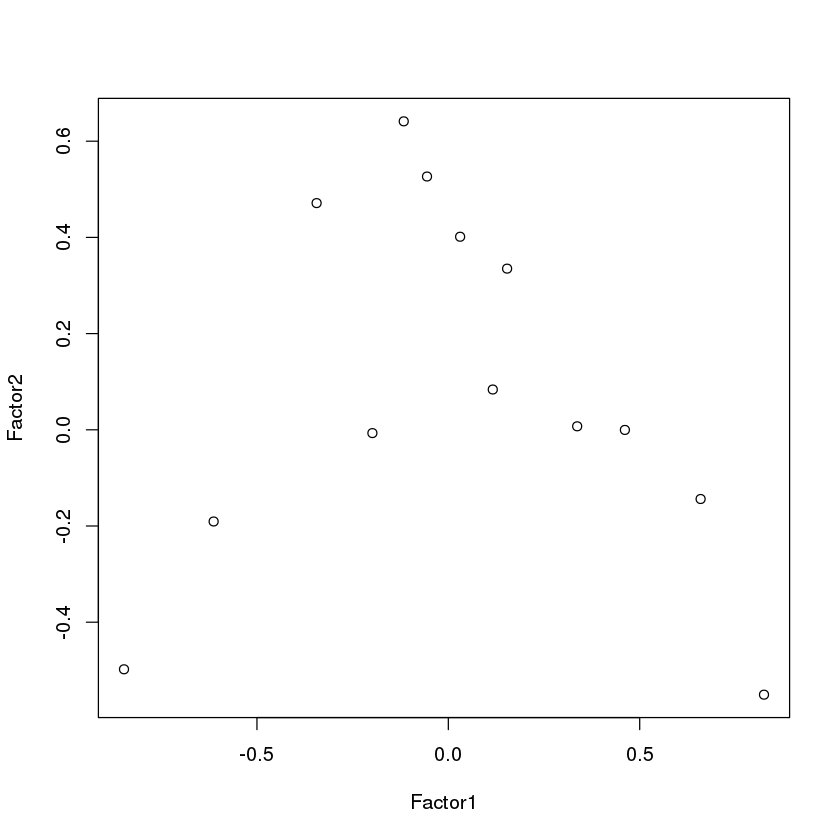

In [67]:
plot(fa1$loadings)
text(fa1$loadings,labels=names(dimnames(X)[2]))
#attributes(X)
#dimnames(X)[2]


NULL

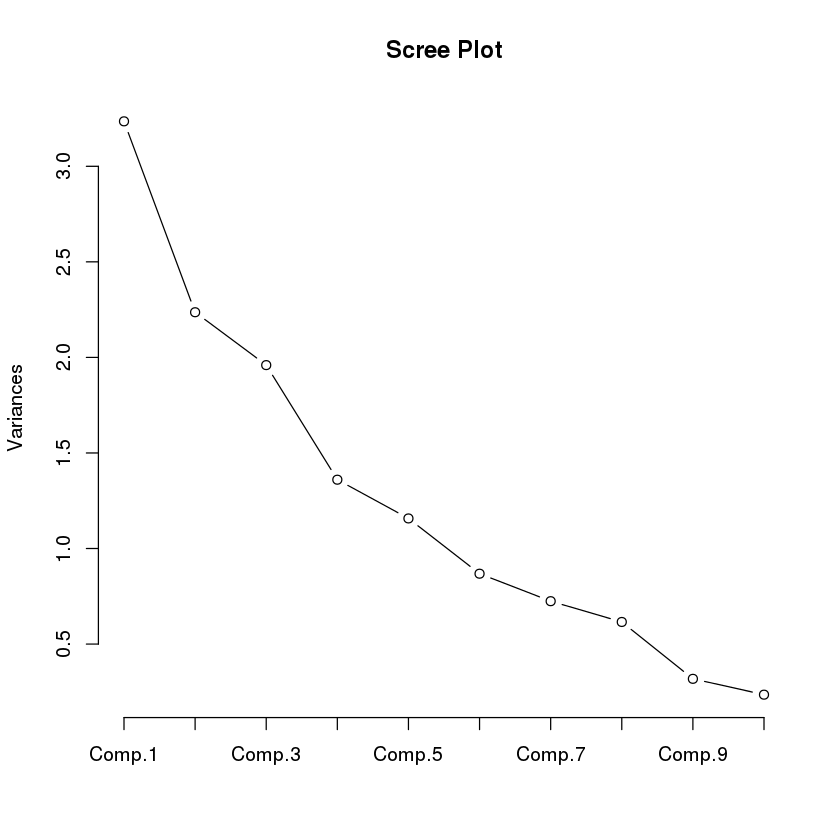

In [7]:
a = screeplot(pca1, type="line", main="Scree Plot")
a

In [8]:
# Loadings of principal components
#loadings(pca1)
pca1$loadings


Loadings:
         Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9 Comp.10
Ag        0.135        -0.385 -0.373  0.411  0.245 -0.433 -0.277  0.152 -0.217 
Mining    0.470         0.260                0.164  0.276  0.148        -0.116 
Constr           0.393 -0.257  0.350  0.196         0.370 -0.499  0.371        
Manuf    -0.183 -0.376 -0.375  0.147  0.111 -0.198  0.151  0.500  0.387        
Manuf_nd        -0.459               -0.465 -0.217  0.102 -0.592 -0.102        
Transp    0.418  0.147        -0.365  0.143 -0.169  0.302        -0.264 -0.108 
Comm     -0.152  0.316        -0.343 -0.550  0.267  0.145  0.101  0.436 -0.383 
Energy    0.247 -0.138         0.416 -0.202  0.689 -0.199                0.116 
TradeW   -0.315        -0.290 -0.442         0.353  0.254        -0.253  0.455 
TradeR           0.261 -0.507  0.227 -0.252 -0.143 -0.146  0.100 -0.515 -0.432 
RE       -0.363         0.447         0.173        -0.359 -0.106        -0.169 
Services -0.380  0.384  0.127

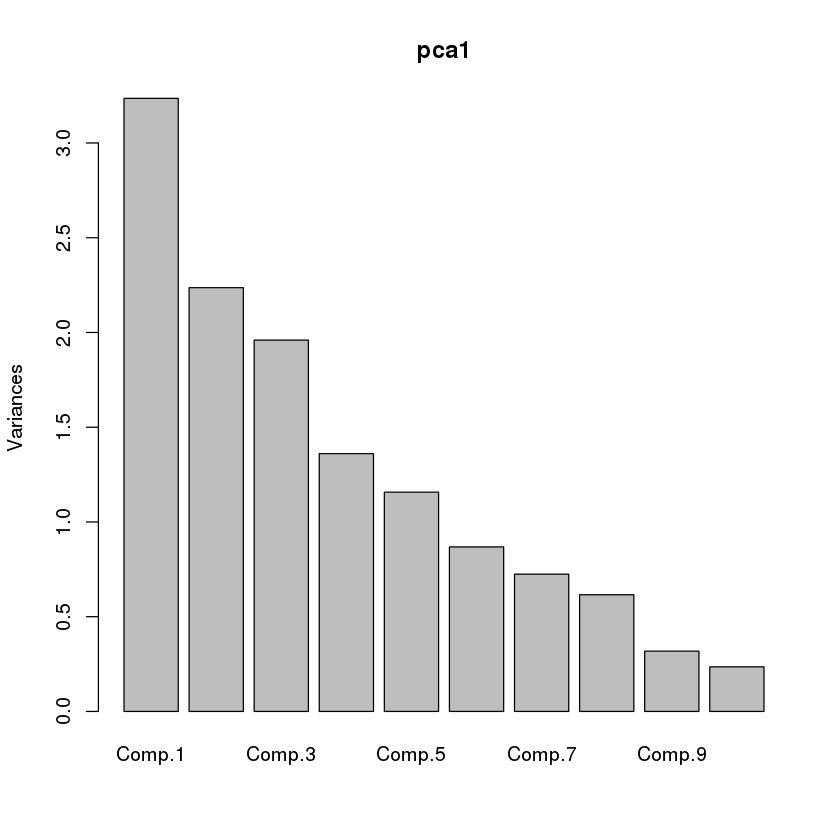

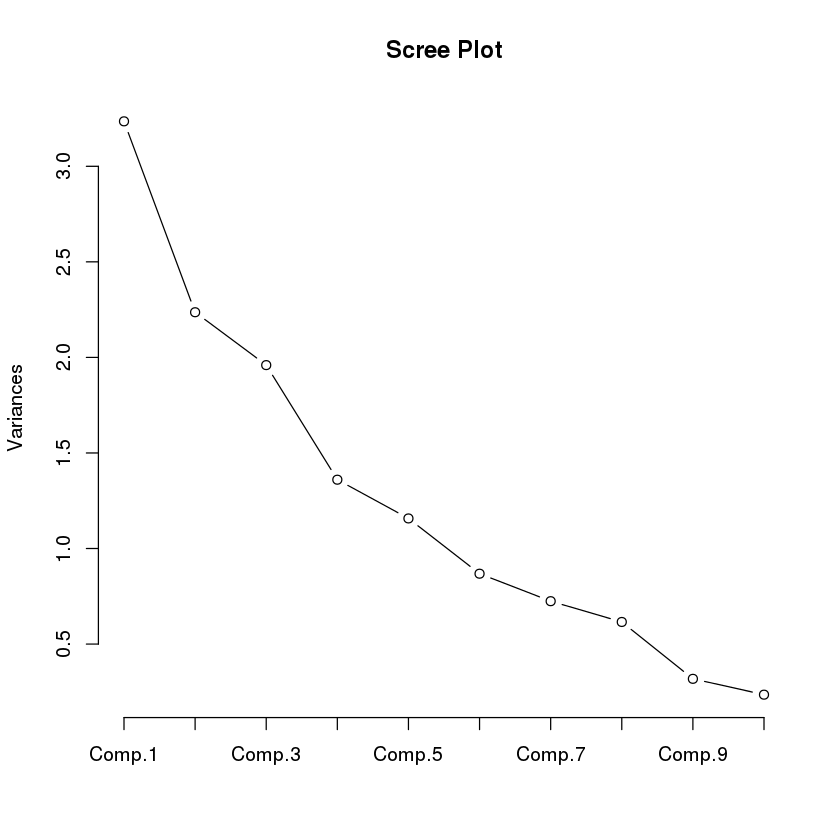

In [9]:
# Scree plot of eigenvalues
plot(pca1)
screeplot(pca1, type="line", main="Scree Plot")

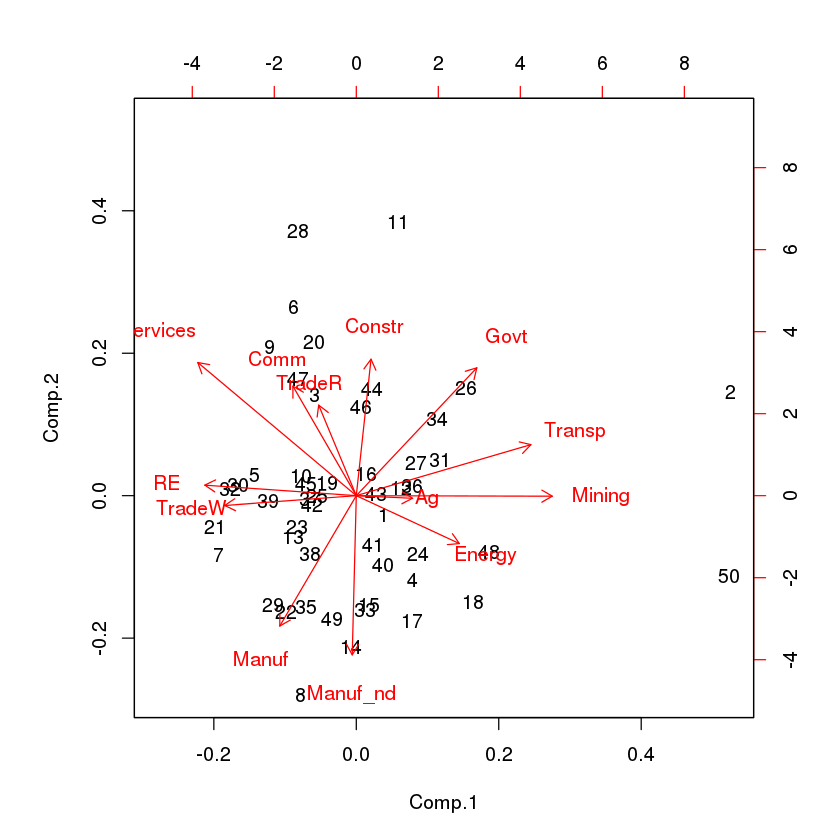

In [8]:
# Biplot of score variables
biplot(pca1)

In [9]:
# Scores of the components
pca1$scores[1:10,]

Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,Comp.11,Comp.12,Comp.13
0.489632866,-0.284015281,-0.920526954,0.087859468,-1.753605266,-0.257291269,-0.312210432,-0.133264371,0.166568099,0.128410837,-0.140545256,-0.117957415,-0.002208128
6.685223490,1.542226113,2.725340931,-2.093830810,0.962152429,-2.425780936,1.241698078,0.835092568,-0.026384854,-0.032823458,0.605774082,0.425026778,0.003800841
-0.751745566,1.488458666,-0.864409443,1.239478206,0.701331979,-0.402380644,0.257176540,0.173094370,0.132049878,-0.332292863,-0.676231581,0.534728229,-0.006031704
1.000034255,-1.252704359,-1.797053335,-0.159525250,-0.628675844,0.311432300,-0.280430416,-0.251551263,-0.269550350,-0.914168148,0.628119948,0.031171042,0.002859382
-1.814395091,0.308317301,1.072827478,-0.620969748,0.587343706,-0.193179671,-0.376609203,0.684787321,-0.601817825,-0.150256279,-0.050439016,-0.577857338,-0.007270775
-1.123135216,2.796657764,0.126628100,-0.834394572,-1.591679784,0.581299693,1.042851031,0.161950066,1.598798056,-1.525389066,-0.020667181,-0.203117454,-0.002517881
-2.4543288713,-0.8838886699,2.2611164643,-0.1769679549,1.0153673276,0.0969366707,-0.2158679466,0.5350483071,0.0668956264,-0.0964873958,-0.0956449418,0.1101873274,0.0001849203
-0.9918321558,-2.9538498878,4.0263967319,0.2203614875,0.4781387943,-1.2400895978,-1.5630879809,-2.3471516024,0.3866207885,-0.4692857893,-0.2483953637,0.8415333144,-0.0004708541
-1.547685023,2.203068043,-0.142846401,0.171087436,-0.147366983,0.467973137,-0.188495291,0.052183101,-1.269734077,-0.645213672,-0.420803199,0.295860084,-0.007958604
-0.99201756,0.29981762,-0.05468377,-2.18146390,-1.87555336,0.87740143,0.94282999,-0.16299252,0.11552867,-0.08515134,-0.14312824,0.31799226,-0.00201370


In [70]:
# Rotation
varimax(pca1$loadings)
#promax(pca1$loadings)

ERROR: Error in vapply(seq_along(mapped), function(i) {: значения должны иметь длину 1,
 но результат FUN(X[[1]]) имеет длину 0


$loadings

Loadings:
         Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9 Comp.10
Ag                                                 -1                          
Mining    1                                                                    
Constr           1                                                             
Manuf                  -1                                                      
Manuf_nd                                                  -1                   
Transp                                                                         
Comm                                 -1                                        
Energy                                       1                                 
TradeW                        -1                                               
TradeR                                                           -1            
RE                                                                             
Services           

In [11]:
# Factor analysis - different results from other softwares and no rotation
fa1 <- factanal(X, factor=3)
fa1$rotmat

0.99888310,0.03283234,0.03397926
-0.02299054,0.96599429,-0.25753927
-0.04127938,0.25647042,0.96567020


In [23]:
fa2 <- factanal(X, factor=3, rotation="varimax")
fa2


Call:
factanal(x = X, factors = 3, rotation = "varimax")

Uniquenesses:
      Ag   Mining   Constr    Manuf Manuf_nd   Transp     Comm   Energy 
   0.863    0.005    0.550    0.518    0.533    0.536    0.874    0.782 
  TradeW   TradeR       RE Services     Govt 
   0.653    0.420    0.005    0.284    0.755 

Loadings:
         Factor1 Factor2 Factor3
Ag        0.154   0.335         
Mining    0.825  -0.551  -0.108 
Constr    0.116           0.656 
Manuf    -0.117   0.641  -0.238 
Manuf_nd          0.401  -0.552 
Transp    0.659  -0.144         
Comm     -0.198           0.294 
Energy    0.461                 
TradeW   -0.344   0.471         
TradeR            0.527   0.547 
RE       -0.847  -0.498  -0.171 
Services -0.613  -0.191   0.551 
Govt      0.337           0.363 

               Factor1 Factor2 Factor3
SS loadings      2.747   1.799   1.674
Proportion Var   0.211   0.138   0.129
Cumulative Var   0.211   0.350   0.479

Test of the hypothesis that 3 factors are sufficient.
The 

In [24]:
fa3 <- factanal(X, factors=3, rotation="varimax", scores="regression")
fa3


Call:
factanal(x = X, factors = 3, scores = "regression", rotation = "varimax")

Uniquenesses:
      Ag   Mining   Constr    Manuf Manuf_nd   Transp     Comm   Energy 
   0.863    0.005    0.550    0.518    0.533    0.536    0.874    0.782 
  TradeW   TradeR       RE Services     Govt 
   0.653    0.420    0.005    0.284    0.755 

Loadings:
         Factor1 Factor2 Factor3
Ag        0.154   0.335         
Mining    0.825  -0.551  -0.108 
Constr    0.116           0.656 
Manuf    -0.117   0.641  -0.238 
Manuf_nd          0.401  -0.552 
Transp    0.659  -0.144         
Comm     -0.198           0.294 
Energy    0.461                 
TradeW   -0.344   0.471         
TradeR            0.527   0.547 
RE       -0.847  -0.498  -0.171 
Services -0.613  -0.191   0.551 
Govt      0.337           0.363 

               Factor1 Factor2 Factor3
SS loadings      2.747   1.799   1.674
Proportion Var   0.211   0.138   0.129
Cumulative Var   0.211   0.350   0.479

Test of the hypothesis that 3 facto